In [ ]:
!pip install pmdarima --quiet
import pmdarima as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sales_df = pd.read_csv("Orders Table.csv")
sales_df = sales_df.drop(['Unnamed: 0'], axis = 1)
# sales_df['Promotional Period'] = np.random.choice(a = [0,1], p = [0.8, 0.2], size=len(sales_df))
sales_df.head(10)
# sales_df.to_csv('Orders Table.csv')

,OrderID,ProductID,CustomerID,Order Date,Shipping Date,Actual days for shipping,Scheduled days for shipping,Late Delivery Risk,Discount Percentage,Returns,Promotional Period
0,77202,5246,15795,1/31/2018 22:56,2/3/2018 22:56,3,4,0,0.04,0,0
1,75939,2362,860,1/13/2018 12:27,1/18/2018 12:27,5,4,1,0.05,1,1
2,75938,13940,76820,1/13/2018 12:06,1/17/2018 12:06,4,4,0,0.06,0,0
3,75937,1105,54886,1/13/2018 11:45,1/16/2018 11:45,3,4,0,0.07,0,1
4,75936,2987,6265,1/13/2018 11:24,1/15/2018 11:24,2,4,0,0.09,0,1
5,75935,285,82386,1/13/2018 11:03,1/19/2018 11:03,6,4,0,0.10,0,1
6,75934,10276,37194,1/13/2018 10:42,1/15/2018 10:42,2,1,1,0.12,0,1
7,75933,4506,87498,1/13/2018 10:21,1/15/2018 10:21,2,1,1,0.13,0,1
8,75932,16345,44131,1/13/2018 10:00,1/16/2018 10:00,3,2,1,0.15,0,1
9,75931,3558,60263,1/13/2018 9:39,1/15/2018 9:39,2,1,1,0.16,0,1


In [ ]:
products_df = pd.read_csv("Products Table.csv")
products_df = products_df.drop(['Unnamed: 0'], axis = 1)
products_df.head(10)

,ProductID,Product Name,Category,Price
0,1,Wayona Nylon Braided USB to Lightning Fast Cha...,Electronics,13.19
1,2,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Electronics,4.19
2,3,Sounce Fast Phone Charging Cable & Data Sync U...,Electronics,22.79
3,4,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Electronics,8.39
4,5,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Electronics,4.79
5,6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Electronics,12.00
6,7,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Electronics,5.99
7,8,MI Usb Type-C Cable Smartphone (Black),Electronics,3.59
8,9,"TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...",Electronics,11.99
9,10,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Electronics,3.59


In [ ]:
# join on Product ID
sales_df = sales_df.set_index('ProductID')
products_df = products_df.set_index('ProductID')
joined_df = sales_df.join(products_df, lsuffix="_sales", rsuffix="_products")
joined_df.tail(10)

,OrderID,CustomerID,Order Date,Shipping Date,Actual days for shipping,Scheduled days for shipping,Late Delivery Risk,Discount Percentage,Returns,Promotional Period,Product Name,Category,Price
ProductID,,,,,,,,,,,,,
17209,26052,55383,1/16/2016 6:49,1/19/2016 6:49,3,4,0,0.16,1,1,DVKA Creations Women's Satin Solid Above The K...,Clothing,8.39
14322,26052,21015,1/16/2016 6:49,1/19/2016 6:49,3,4,0,0.17,0,1,CUPID Women's Cotton Plus Size Plain Half Slee...,Clothing,17.94
2456,26051,36367,1/16/2016 6:28,1/18/2016 6:28,2,2,0,0.18,0,0,EthnicJunction Women's Kanchipuram Silk Woven ...,Clothing,25.91
12526,26050,97715,1/16/2016 6:07,1/22/2016 6:07,6,4,1,0.20,0,0,ARTIBETTER 1pc Blue Light Blocking Glasses Ret...,Clothing,24.00
20291,26047,18866,1/16/2016 5:04,1/19/2016 5:04,3,4,0,0.25,0,0,Navya Diseno Present Banarasi Soft Lichi Silk ...,Clothing,35.99
13370,26043,53374,1/16/2016 3:40,1/20/2016 3:40,4,4,0,0.00,0,0,RIVER by Rajdeep Ranawat Premium Designer Wome...,Clothing,33.59
3246,26037,91268,1/16/2016 1:34,1/19/2016 1:34,3,2,1,0.01,0,0,Flyer stole / scarf for girl / ladies Colour- ...,Clothing,14.39
8222,26024,59589,1/15/2016 21:00,1/20/2016 21:00,5,4,1,0.02,0,1,TIGYWIGY Women's Satin Plain/Solid Top and Pyj...,Clothing,17.99
275,26022,10920,1/15/2016 20:18,1/18/2016 20:18,3,4,0,0.03,0,0,Airtel Digital TV HD Set Top Box with 1 Month ...,Electronics,27.59


In [ ]:
### EDA
df = joined_df

# split Order Date column into Date and Time columns
df[['Order Date', 'Order Time']] = df['Order Date'].str.split(' ', expand=True)

# convert Date column to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# extract month from Date
df['Month'] = df['Order Date'].dt.strftime('%b')

# drop day and time from Order Date column
df['Year-Month'] = df['Order Date'].dt.strftime('%Y-%m')

# drop unused columns
df = df.drop(['CustomerID', 'OrderID'], axis = 1)

# normalise Sales column
# df['log_sales'] = np.log(df['Sales'])
# df['scaled_sales'] = np.log(df['Sales'] / df['Product Price'])

# sort by date
df = df.sort_values('Order Date')

df.head(10)

,Order Date,Shipping Date,Actual days for shipping,Scheduled days for shipping,Late Delivery Risk,Discount Percentage,Returns,Promotional Period,Product Name,Category,Price,Order Time,Month,Year-Month
ProductID,,,,,,,,,,,,,,
6598,2015-01-01,1/3/2015 12:15,2,2,0,0.06,0,0,Rock Paper Scissors Premium Flare Gym Pants Hi...,Clothing,20.99,12:15,Jan,2015-01
1282,2015-01-01,1/4/2015 3:51,3,4,0,0.02,0,0,Proven® Copper + Mineral RO+UV+UF 10 to 12 Lit...,Home Appliances,239.88,3:51,Jan,2015-01
14813,2015-01-01,1/4/2015 3:51,3,4,0,0.07,0,1,ANNI DESIGNER Women's Cotton Blend Printed Ana...,Clothing,31.19,3:51,Jan,2015-01
7742,2015-01-01,1/7/2015 17:10,6,4,0,0.03,0,1,Pratham Blue Women's Sequins Georgette Fancy S...,Clothing,47.99,17:10,Jan,2015-01
10556,2015-01-01,1/7/2015 15:24,6,4,1,0.16,0,1,SHAUN Women's Regular Fit Cotton Blend Track Pant,Clothing,11.99,15:24,Jan,2015-01
4894,2015-01-01,1/3/2015 14:42,2,1,1,0.03,0,0,Pujia Mills Women's Heavy Silver Jari Thread R...,Clothing,36.00,14:42,Jan,2015-01
11945,2015-01-01,1/4/2015 19:37,3,4,0,0.25,0,1,Coblue by Rupa 100% Cotton Panties for Women (...,Clothing,4.79,19:37,Jan,2015-01
5523,2015-01-01,1/7/2015 1:24,6,4,1,0.16,0,0,YOUSTYLO - YOU ARE PRIORITY Men's Women's Slou...,Clothing,11.99,1:24,Jan,2015-01
17383,2015-01-01,1/3/2015 22:04,2,1,1,0.16,1,0,WoodenTant Women Handloom Checkered pure Cotto...,Clothing,26.40,22:04,Jan,2015-01


In [ ]:
date = df['Year-Month'].unique()
sales = df.groupby('Year-Month').size()

df = np.array([date, sales])

In [ ]:
pred_date = np.arange(np.datetime64("2018-02"), np.datetime64("2019-01"), np.timedelta64(1, "M"))

In [ ]:
pred_date = pd.to_datetime(pred_date, format='%Y-%m')

In [ ]:
pred_date = pred_date.strftime('%Y-%m')

In [ ]:
pred_date

Index(['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10', '2018-11', '2018-12'],
      dtype='object')

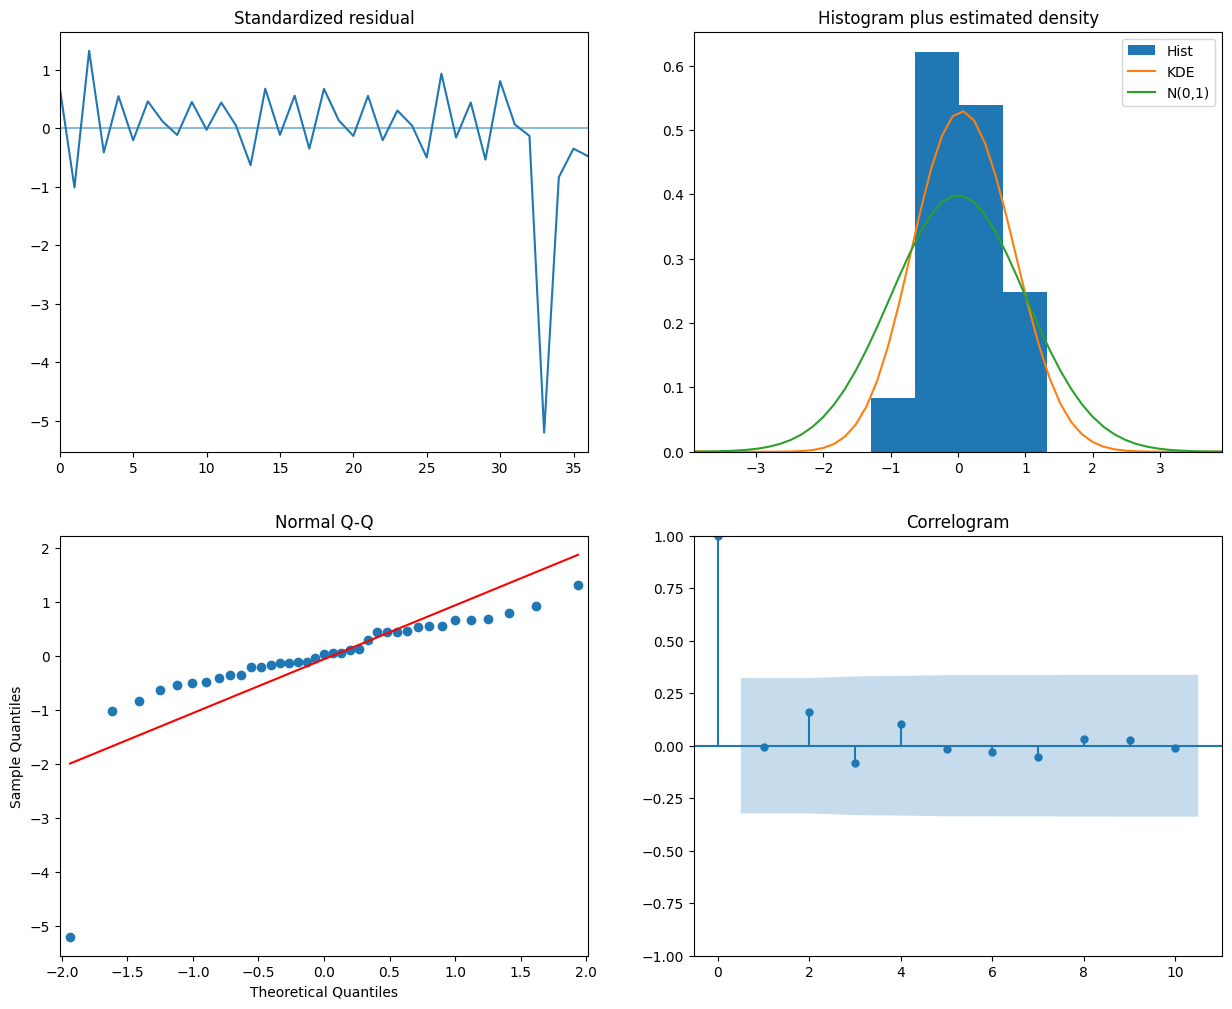

In [ ]:
SARIMA_model = pm.auto_arima(df[1], seasonal=True, #set to seasonal
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

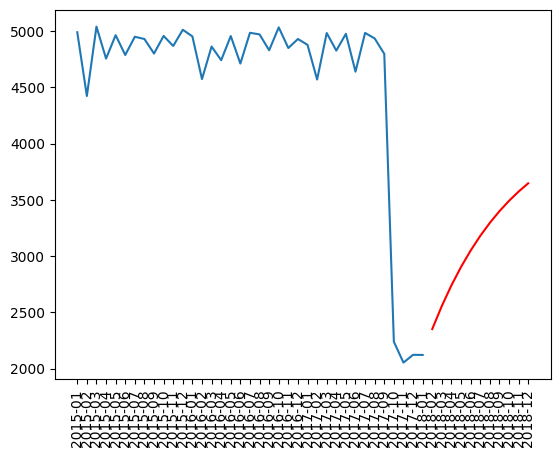

In [ ]:
pred = SARIMA_model.predict(len(pred_date))

plt.plot(date, sales, label='Train')
plt.plot(pred_date, pred, label='Forecast', color='red')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train_size = int(len(df[0]) * 0.7)
train, test = df[:, :train_size], df[:, train_size:]

In [ ]:
len(df[0])

37

In [ ]:
train

array([['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
        '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
        '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
        '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
        '2017-01'],
       [4988, 4422, 5038, 4754, 4962, 4786, 4948, 4928, 4799, 4955, 4866,
        5010, 4951, 4572, 4861, 4740, 4954, 4710, 4983, 4969, 4828, 5031,
        4848, 4928, 4876]], dtype=object)

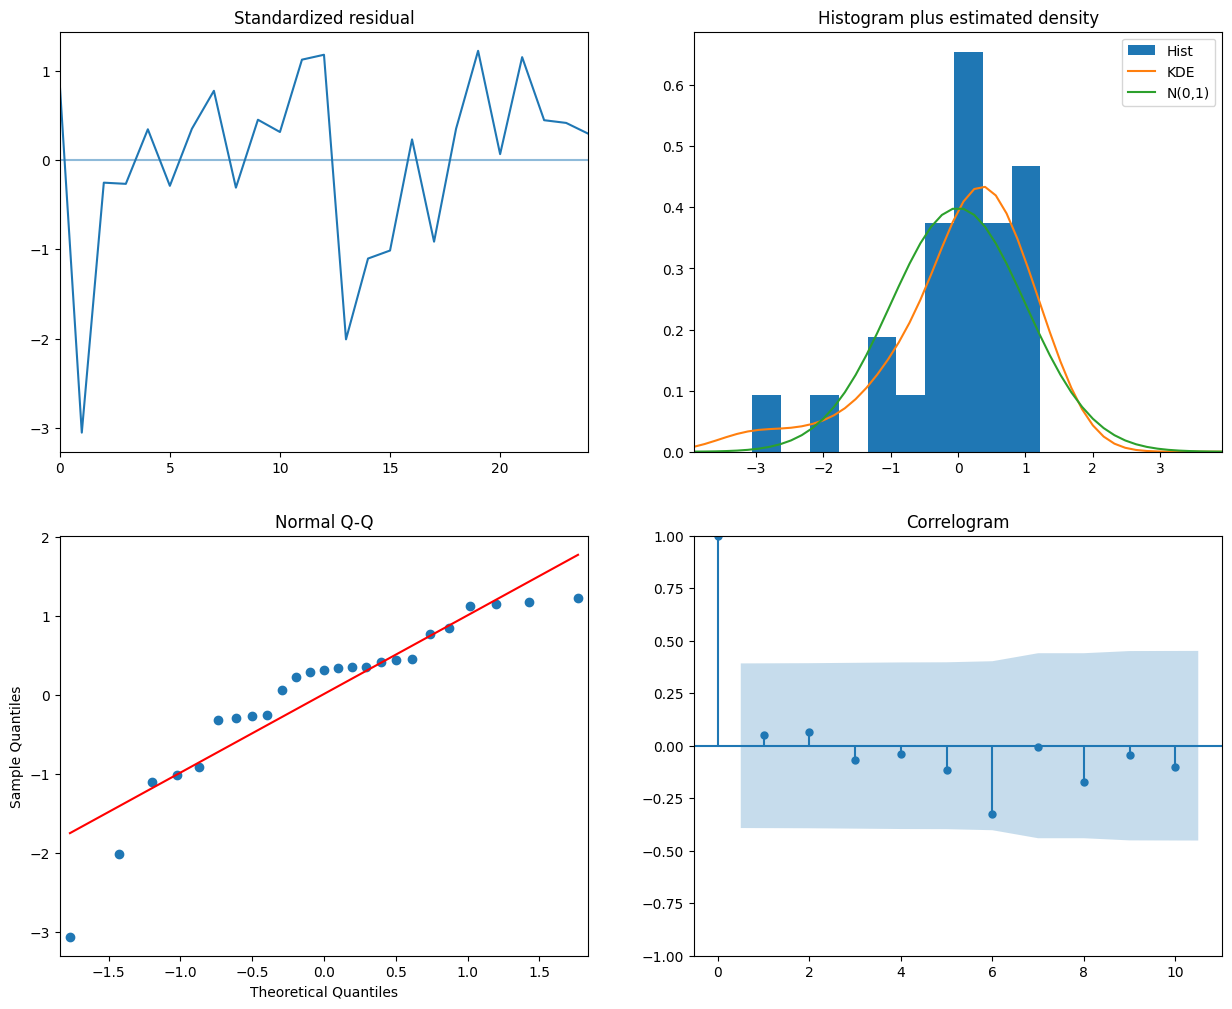

In [ ]:
SARIMA_model = pm.auto_arima(train[1], seasonal=True, #set to seasonal
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',
                         suppress_warnings=True,
                         stepwise=True)

SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

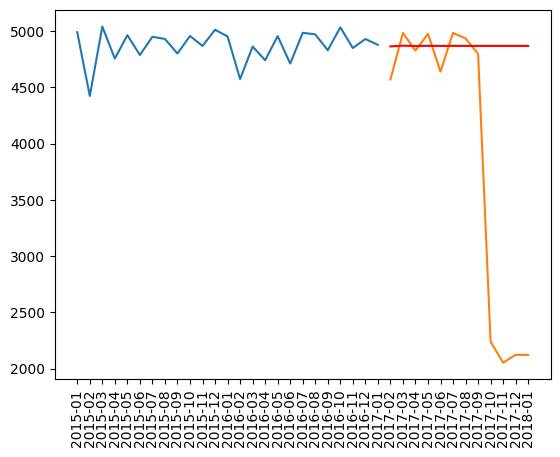

In [ ]:
pred = SARIMA_model.predict(len(test[1]))

plt.plot(train[0], train[1], label='Train')
plt.plot(test[0], test[1], label='Actual')
plt.plot(test[0], pred, label='Forecast', color='red')
plt.xticks(rotation=90)
plt.show()